### INVATAREA SUPERVIZATA: CLASIFICARE(N=219)

#### Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

                  Model    Set  Accuracy  Precision  Recall  F1 Score
0   Logistic Regression  Train     1.000   1.000000    1.00  1.000000
1   Logistic Regression   Test     0.945   0.915888    0.98  0.946860
2                   LDA  Train     1.000   1.000000    1.00  1.000000
3                   LDA   Test     1.000   1.000000    1.00  1.000000
4                   QDA  Train     1.000   1.000000    1.00  1.000000
5                   QDA   Test     0.885   1.000000    0.77  0.870056
6                   KNN  Train     0.726   0.645995    1.00  0.784929
7                   KNN   Test     0.675   0.606061    1.00  0.754717
8                   SVM  Train     1.000   1.000000    1.00  1.000000
9                   SVM   Test     1.000   1.000000    1.00  1.000000
10        Random Forest  Train     1.000   1.000000    1.00  1.000000
11        Random Forest   Test     1.000   1.000000    1.00  1.000000
12             AdaBoost  Train     1.000   1.000000    1.00  1.000000
13             AdaBo

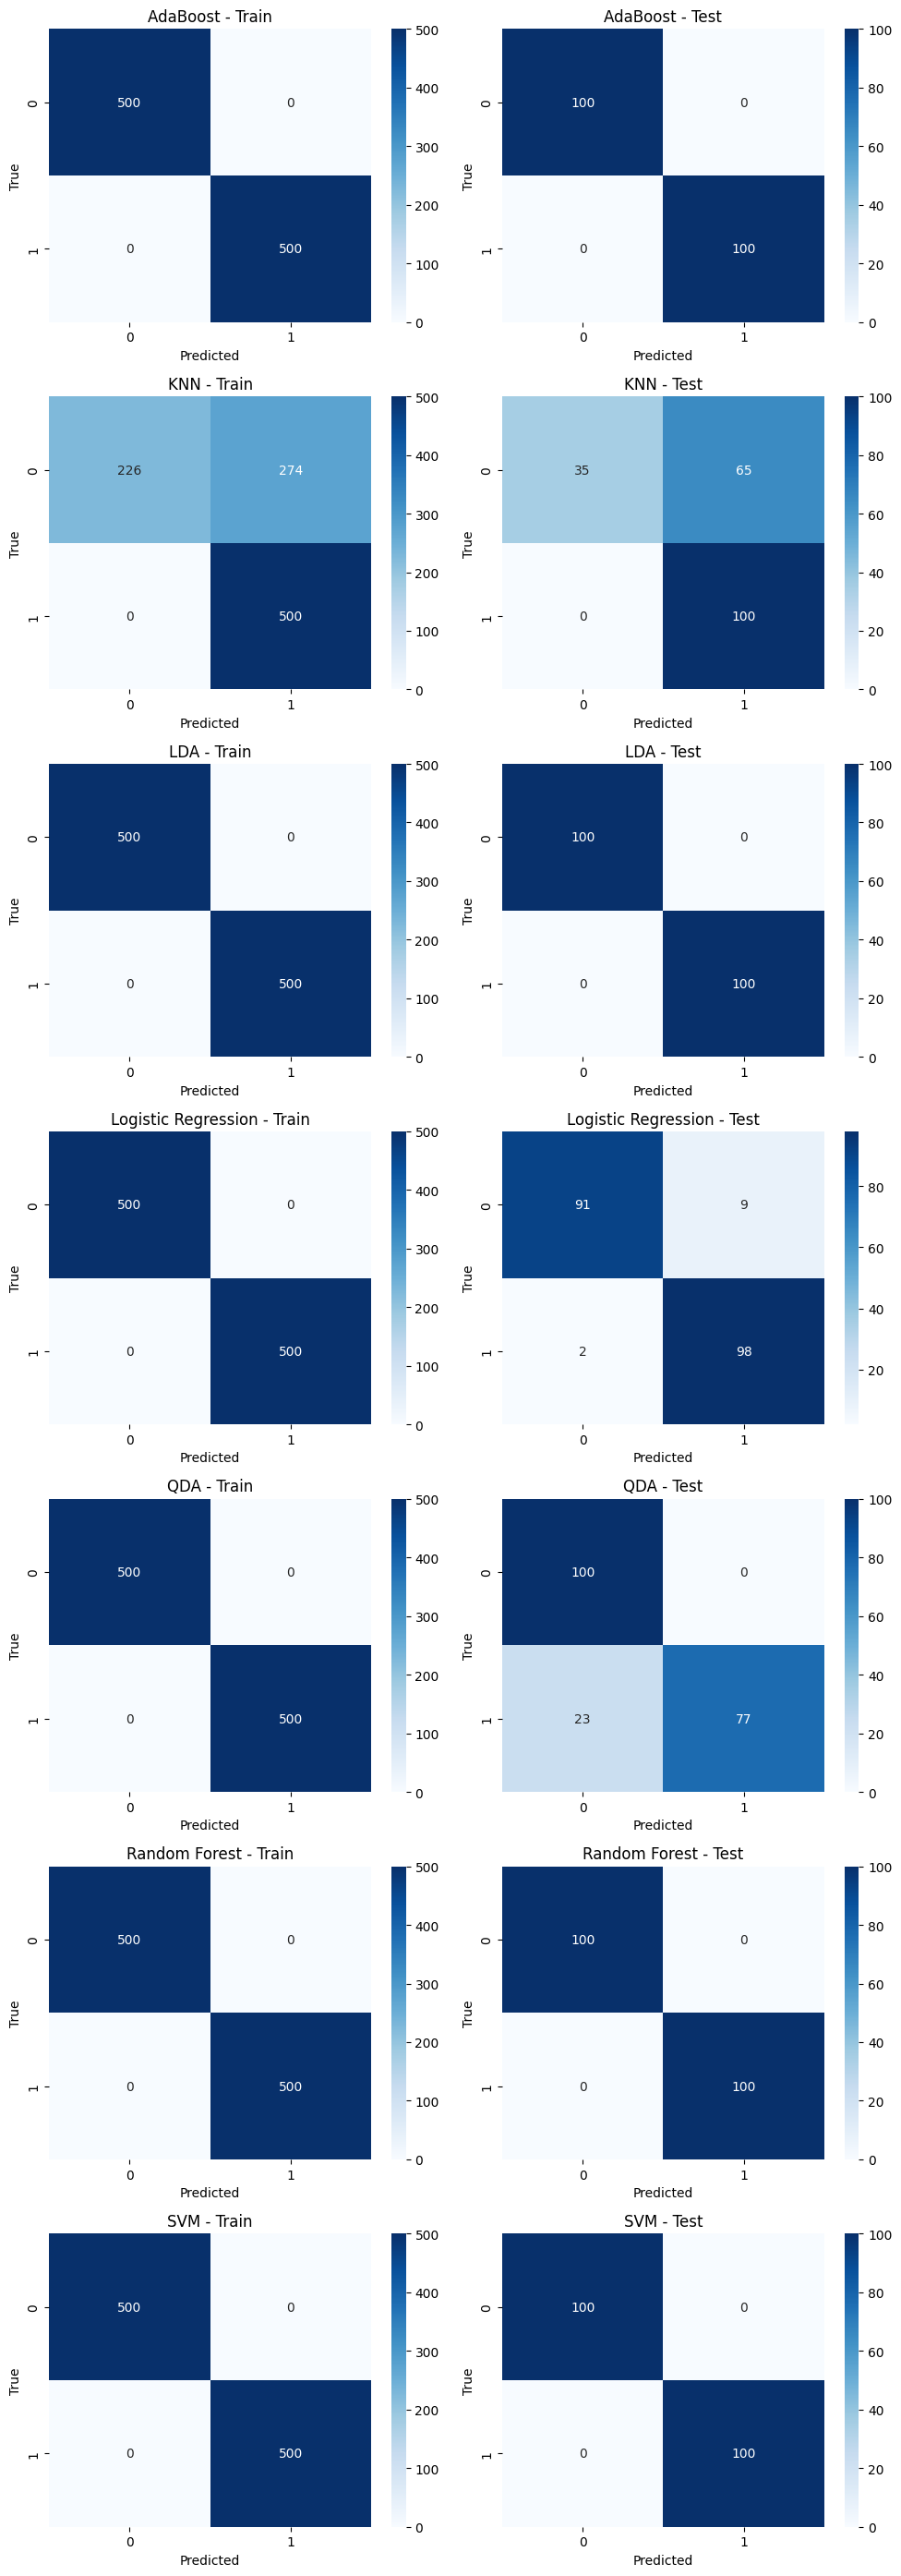

In [3]:
# === 1. Încărcare date ===
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:-1, :].T   # Fără ultima linie = features
    y = data[-1, :].astype(int)  # Ultima linie = etichete
    return X, y

X_train, y_train = load_data("Training_Set_Labeled_data.txt")
X_test, y_test = load_data("Test_Set_Labeled_data.txt")


# === 2. Clasificatori ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LDA(),
    "QDA": QDA(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}


# === 3. Evaluare ===
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    for dataset_name, X, y_true in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
        y_pred = model.predict(X)
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            "Model": name,
            "Set": dataset_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Confusion Matrix": cm
        })

# === 4. Afișare metrici ===
results_df = pd.DataFrame(results).drop(columns=["Confusion Matrix"])
print(results_df)

# === 5. Matricea de confuzie pentru fiecare ===
fig, axes = plt.subplots(len(models), 2, figsize=(10, len(models) * 4))
for i, (model_name, group) in enumerate(results_df.groupby("Model")):
    for j, subset in enumerate(["Train", "Test"]):
        cm = [r for r in results if r["Model"] == model_name and r["Set"] == subset][0]["Confusion Matrix"]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i, j])
        axes[i, j].set_title(f"{model_name} - {subset}")
        axes[i, j].set_xlabel("Predicted")
        axes[i, j].set_ylabel("True")

plt.tight_layout()
plt.show()


### INVATAREA SUPERVIZATA: CLASIFICARE(N=2 PCA)